# Twitter Sentiment Analysis
Sentiment Analysis is one of the application of Natural Language processing (NLP). It involves classifying a piece of text as negative,positive or neutral.
##### The objective of this project is to recognize whether the given tweet is oriented as positive(1), negative(-1) or neutral(0)

### Step 1: Loading the relevant libraries

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re # for regular expressions
import nltk # for text manipulation
import string
import warnings
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

### Step 2: Loading the data

In [2]:
# load the data
data=pd.read_csv("Twitter_Data.csv")
data.head()

,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0


#### Text is a highly unstructured data with various types of noises present in it and the data cannot be analyzed properly with preprocessing. Thus data preprocessing involves first inspecting the data and then cleaning it for applying the model.

### Step 3: Data Inspection

In [3]:
# checking few positive tweets
data[data['category']==1.0].head()

,clean_text,category
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0
8,with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho,1.0
9,gandhi was gay does modi,1.0


In [4]:
# checking few neutral tweets
data[data['category']==0.0].head()

,clean_text,category
1,talk all the nonsense and continue all the drama will vote for modi,0.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace for narendra modi become again\n,0.0
7,this comes from cabinet which has scholars like modi smriti and hema time introspect,0.0
13,one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his vote kar campaign,0.0


In [5]:
# checking few negative tweets
data[data['category']==(-1.0)].head()

,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1.0
15,vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party,-1.0
19,didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti,-1.0
21,with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today,-1.0
23,sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh,-1.0


In [6]:
# Checking for total number of missing values in each category
data.isna().sum()

clean_text    4
category      7
dtype: int64

In [7]:
# Since the total data is very large compared to the missing values
# We can drop all the rows with null values
data.dropna(axis=0,inplace=True)
data_cleaned=data.reset_index(drop=True)

In [8]:
# Again checking whether null values are present or not in the datset
data_cleaned.isna().sum()

clean_text    0
category      0
dtype: int64

In [9]:
# Checking the dimensions of our data
data_cleaned.shape
# There are 1,62,969 rows and 2 columns

(162969, 2)

In [10]:
# Counting the total number of values in each category
data_cleaned['category'].value_counts()

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

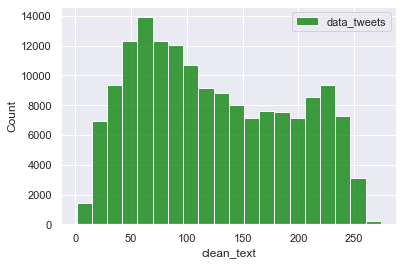

In [11]:
# checking the length of the data
length_data=data_cleaned['clean_text'].str.len()
sns.histplot(length_data,bins=20,label='data_tweets',color='green')
plt.legend()
plt.show()

#### Cleaning raw data is an important step as it helps in getting rid of unwanted words and characters which helps in obtaining better features
#### It is always better to remove special symbols such as punctuation, special characters, numbers or terms which don't carry much weightage in the analysis

### Step 4: Data Cleaning

In [12]:
# To remove all the unwanted text patterns from the tweets
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i," ",input_txt)
    return input_txt

In [13]:
# Although the given data has no twitter handles present but it is always better to make a code
# for it in case there are few present in it.
# 1. Removing Twitter Handles(@user)
data_cleaned['tidy_tweet']=np.vectorize(remove_pattern)(data_cleaned['clean_text'],"@[\w]*")

In [14]:
# 2. Removing punctuations,numbers and special characters
data_cleaned['tidy_tweet']=data_cleaned['tidy_tweet'].str.replace("[^a-zA-Z#]"," ",regex=True)

In [15]:
# 3. Removing short words since short words like 'hmm','his','ohh'... does not carry any important message
data_cleaned['tidy_tweet']=data_cleaned['tidy_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
data_cleaned.head()
# Below is the cleaned data which we can stored in the new column named as 'tidy_tweets'

,clean_text,category,tidy_tweet
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1.0,when modi promised minimum government maximum governance expected begin difficult reforming state does take years justice state should business should exit psus temples
1,talk all the nonsense and continue all the drama will vote for modi,0.0,talk nonsense continue drama will vote modi
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0,what just vote modi welcome told rahul main campaigner modi think modi should just relax
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1.0,asking supporters prefix chowkidar their names modi great service there confusion what read what crustal clear what will crass filthy nonsensical most abuses coming from chowkidars
4,answer who among these the most powerful world leader today trump putin modi may,1.0,answer among these most powerful world leader today trump putin modi


### Step 5: Text Normalization
#### Next step involves Text Normalization which involves extracting base terms from the morphological words. Before that we need to tokenize the tweets. Tokenization is the process of splitting a string of texts into tokens

In [16]:
#Tokenization of strings. Tokens are individual terms or words
tokenized_tweet=data_cleaned['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0           [when, modi, promised, minimum, government, maximum, governance, expected, begin, difficult, reforming, state, does, take, years, justice, state, should, business, should, exit, psus, temples]
1                                                                                                                                                        [talk, nonsense, continue, drama, will, vote, modi]
2                                                                                                   [what, just, vote, modi, welcome, told, rahul, main, campaigner, modi, think, modi, should, just, relax]
3    [asking, supporters, prefix, chowkidar, their, names, modi, great, service, there, confusion, what, read, what, crustal, clear, what, will, crass, filthy, nonsensical, most, abuses, coming, from, ...
4                                                                                                                           [answer, among, these, most, powerful, world, leader, to

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer=nltk.wordnet.WordNetLemmatizer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

In [18]:
# stitching these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
data_cleaned['tidy_tweet']=tokenized_tweet
data_cleaned.head()

,clean_text,category,tidy_tweet
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1.0,when modi promised minimum government maximum governance expected begin difficult reforming state doe take year justice state should business should exit psus temple
1,talk all the nonsense and continue all the drama will vote for modi,0.0,talk nonsense continue drama will vote modi
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0,what just vote modi welcome told rahul main campaigner modi think modi should just relax
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1.0,asking supporter prefix chowkidar their name modi great service there confusion what read what crustal clear what will crass filthy nonsensical most abuse coming from chowkidars
4,answer who among these the most powerful world leader today trump putin modi may,1.0,answer among these most powerful world leader today trump putin modi


### Step 6: Making Word Clouds (Visualization from tweets)
#### Visualizing the data is an important step for story telling and gaining insights
#### A WordCloud is a type of visualization where most frequent words appear in larger size and less frequent words in smaller size which helps in understanding the most common words used in the tweets.

In [19]:
# Joining all the words for all tweets
all_words=' '.join([text for text in data_cleaned['tidy_tweet']])

In [20]:
# Importing the wordcloud module
from wordcloud import WordCloud

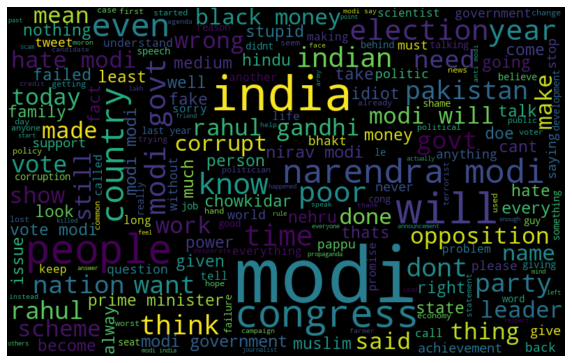

In [21]:
# visualizing the words used in negative tweets
negative_words=" ".join([text for text in data_cleaned['tidy_tweet'][data_cleaned['category']==(-1.0)]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

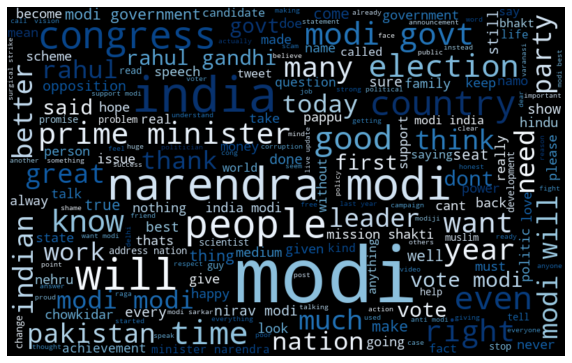

In [22]:
# visualizing the words used in positive tweets
positive_words=" ".join([text for text in data_cleaned['tidy_tweet'][data_cleaned['category']==1.0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,colormap="Blues").generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

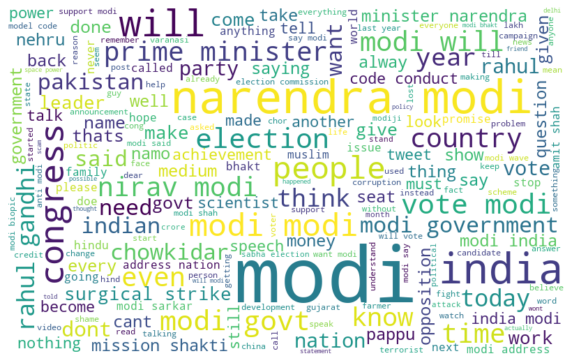

In [23]:
# visualizing the  words used in neutral tweets
neutral_words=" ".join([text for text in data_cleaned['tidy_tweet'][data_cleaned['category']==0.0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color="white").generate(neutral_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Step 7: Data Analyses
#### To analyze the preprocessed data, it needs to be converted into features. Depending upon the usage, a text data can be constructed using assorted techniques such as Bag of words, TF-IDF and Word Embeddings
#### Here we are using TF-IDF Features- TF-IDF means Term Frequency - Inverse Document Frequency. ... TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

In [24]:
# Importing the module from sklearn for TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# creating an instance of the class TFIDFVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.9,min_df=2,max_features=10000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(data_cleaned['tidy_tweet'])
tfidf.shape

(162969, 10000)

### Step 8: Modeling
#### We will now build the model on the datasets with different feature sets prepared in the earlier sections
#### Here we will be using the LogisticRegression algorithm for the model
#### F1 score -- is used as the evaluation metric. It is the weighted average of Precision and Recall . Thus, this score takes both false positives and false negatives into account. 
#### Logistic Regression -- It is a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variables..It also predicts the probability of occurence of an event by fitting data to a logit function

In [26]:
# Importing the following modules from sklearn for our model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,classification_report

In [27]:
# splitting the data into training and testing set
# We are using split size as 0.2 which means 80% od data is used for training the data and 20% for testing it
xtrain_tfidf,xtest,ytrain_tfidf,ytest=train_test_split(tfidf,data_cleaned['category'],random_state=42,test_size=0.2)
xtrain_tfidf.shape,xtest.shape

((130375, 10000), (32594, 10000))

In [28]:
# splitting the data into training and testing set
# For cross validation we are further splitting the train data into training and validation dataset
# here test size is set to 0.15.
# 85% data is used for training the model and 15% for validation
xtrain,xvalid,ytrain,yvalid=train_test_split(xtrain_tfidf,ytrain_tfidf,random_state=42,test_size=0.15)
xtrain.shape,xvalid.shape

((110818, 10000), (19557, 10000))

In [29]:
# training the model
# creating an instance of the class LogisticRegression
lreg=LogisticRegression(max_iter=500)
lreg.fit(xtrain,ytrain)
# Predicting the variables 
train_predict=lreg.predict(xtrain)
# comparing the predicted values from the target values
f1_score(ytrain,train_predict,average='micro')

0.8494378169611435

In [30]:
# validating our training on validation dataset before testing it on the final data
valid_predict=lreg.predict(xvalid)
f1_score(yvalid,valid_predict,average='micro')

0.8165362785703327

In [31]:
# At last testing our data for good accuracy(here f1 score)
test_predict=lreg.predict(xtest)
f1_score(ytest,test_predict,average='micro')

0.8158556789593177

### Step 9: Making confusion matrix 
#### Now, it's time to wrap-up things. For this we are making confusion matrix which gives an idea about true positives, true negatives, false positives and false negatives in our final score 

In [32]:
# confusion matrix
cf_matrix=confusion_matrix(ytest,test_predict)
cf_matrix

array([[ 5026,   962,  1164],
       [  202, 10182,   683],
       [  849,  2142, 11384]], dtype=int64)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

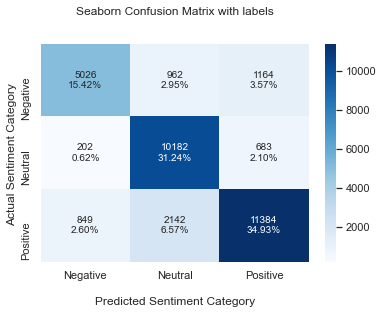

In [33]:
# There is a nicer and neater way of presenting the confusion matrix using heatmaps. 
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'])

In [34]:
# We can also print a nice summary giving values for precision, recall and f-score using classification report from sklearn
class_report=classification_report(ytest,test_predict)
print(class_report)

              precision    recall  f1-score   support

        -1.0       0.83      0.70      0.76      7152
         0.0       0.77      0.92      0.84     11067
         1.0       0.86      0.79      0.82     14375

    accuracy                           0.82     32594
   macro avg       0.82      0.80      0.81     32594
weighted avg       0.82      0.82      0.81     32594



# F1 score = 82%
# Recall = 80%
# Precision= 82%